In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import subprocess
import numpy as np
import uproot
import awkward as ak
import dask_awkward as dak
import distributed
from matplotlib import colors

In [2]:
filelist = ['root://fndcadoor.fnal.gov/pnfs/fnal.gov/usr/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-005-000/root/66/98/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-005-000.001635_000.root:run',
        'root://fndcadoor.fnal.gov/pnfs/fnal.gov/usr/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-005-000/root/32/6e/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-005-000.001635_001.root:run',
        'root://fndcadoor.fnal.gov/pnfs/fnal.gov/usr/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-005-000/root/d0/09/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-005-000.001636_000.root:run',
        'root://fndcadoor.fnal.gov/pnfs/fnal.gov/usr/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-005-000/root/56/64/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-005-000.001636_001.root:run',
        'root://fndcadoor.fnal.gov/pnfs/fnal.gov/usr/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-005-000/root/fb/fa/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-005-000.001636_002.root:run',
        'root://fndcadoor.fnal.gov/pnfs/fnal.gov/usr/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-005-000/root/eb/dc/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-005-000.001636_003.root:run',
        'root://fndcadoor.fnal.gov/pnfs/fnal.gov/usr/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-005-000/root/1c/94/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-005-000.001637_000.root:run']

In [3]:
da = uproot.dask(filelist)

Text(0.5, 0, 'PEs')

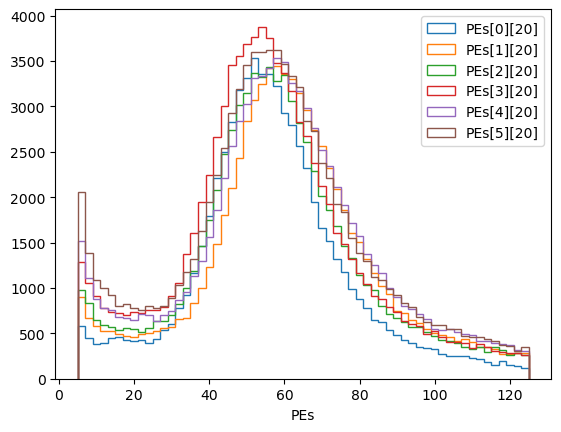

In [4]:
for feb in range(0,6):
    plt.hist(da['PEs'][:,feb,20].compute(), histtype='step', bins=60, range=[5, 125], label='PEs[%d][20]'%feb);
plt.legend()
plt.xlabel('PEs')

In [5]:
#Mask layers in the trigger modules above the 10 PE threshold
FEB0_0 = (dak.sum(da['PEs'][:,0,0:32], axis=-1)>10)
FEB0_1 = (dak.sum(da['PEs'][:,0,32:64], axis=-1)>10)

FEB1_0 = (dak.sum(da['PEs'][:,1,0:32], axis=-1)>10)
FEB1_1 = (dak.sum(da['PEs'][:,1,32:64], axis=-1)>10)

FEB2_0 = (dak.sum(da['PEs'][:,2,0:32], axis=-1)>10)
FEB2_1 = (dak.sum(da['PEs'][:,2,32:64], axis=-1)>10)

FEB5_0 = (dak.sum(da['PEs'][:,5,0:32], axis=-1)>10)
FEB5_1 = (dak.sum(da['PEs'][:,5,32:64], axis=-1)>10)

arr_clean = da[FEB0_0 & FEB0_1 & FEB1_0 & FEB1_1 & FEB2_0 & FEB2_1 & FEB5_0 & FEB5_1]

/home/oksuzian/.conda/envs/MyEnv/lib/python3.10/site-packages/dask_awkward/lib/core.py:1285: UserWarning: metadata could not be determined; a compute on the first partition will occur.
  warnings.warn(


In [6]:
#Mask layers in the test module above the 10 PE threshold
FEB3_0 = (dak.sum(arr_clean['PEs'][:,3,0:32], axis=-1)>10)
FEB3_1 = (dak.sum(arr_clean['PEs'][:,3,32:64], axis=-1)>10)

FEB4_0 = (dak.sum(arr_clean['PEs'][:,4,0:32], axis=-1)>10)
FEB4_1 = (dak.sum(arr_clean['PEs'][:,4,32:64], axis=-1)>10)

In [7]:
nHits = ak.values_astype(FEB3_0.compute(), "int")+ \
       ak.values_astype(FEB3_1.compute(), "int")+ \
       ak.values_astype(FEB4_0.compute(), "int")+ \
       ak.values_astype(FEB4_1.compute(), "int")

In [8]:
nPass = ak.count(arr_clean['eventNumber'].compute()[(nHits==4) | (nHits==3)])
nTrig = ak.count(arr_clean['eventNumber'].compute())
print('3-4 efficiency: %.2f'%(nPass/nTrig*100))

3-4 efficiency: 99.95


In [9]:
nPass = ak.count(arr_clean['eventNumber'].compute()[(nHits==4)])
nTrig = ak.count(arr_clean['eventNumber'].compute())
print('4-4 efficiency: %.2f'%(nPass/nTrig*100))

4-4 efficiency: 98.53


Text(0.5, 0, 'nHits')

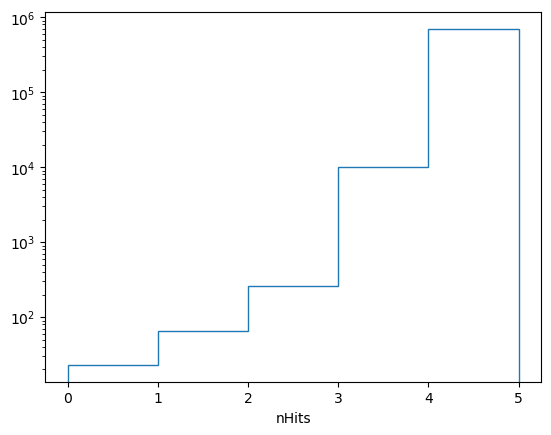

In [10]:
plt.hist(nHits, histtype='step', bins=5, range=(0,5));
plt.yscale('log')
plt.xlabel('nHits')

In [11]:
#Failed events with only one hit in CRV
arr_clean[['eventNumber', 'subrunNumber', 'runNumber']].compute()[(nHits==1)]

<Array [{eventNumber: 269, ...}, ..., {...}] type='66 * {eventNumber: int32...'>